In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
G = 6.67*10**(-11) #m^3/kg/s^2
g = 9.81 #m/s^2
M_e = 5.9*10**(24) #kg
M_m = 7.3*10**(22) #kg
M_a = 5500 #kg
R_e = 6378*1000 #m
R_m = 1737*1000 #m
D = 3.8*10**(8) #distance between earth and moon - m
EV = 2.4*10**(3) #m/s exhaust velocity
B = 1.3*10**(4) #Burn rate kg/s
M_w = 2.4*10**3 #m/s
M_d = 7.5*10**5 #kg

In [2]:
#1.1
def phi(x, y):
    x_m = 0
    y_m = 0
    return G*M_e/(np.sqrt((x-x_m)**2+(y-y_m)**2)) 

Text(0.5, 1.0, 'Plot of Gravitational Potential')

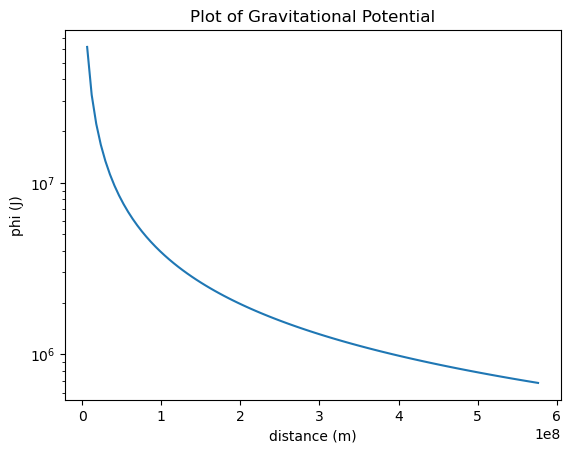

In [34]:
#1.2
y = 0
d = (1.5*D)+R_e
x=np.linspace(R_e,d,100)
fig,ax = plt.subplots()
ax.plot(x,np.abs(phi(x,y)))
ax.set_yscale('log')
ax.set_xlabel('distance (m)')
ax.set_ylabel('phi (J)')
ax.set_title('Plot of Gravitational Potential')

Text(0.5, 1.0, 'Color-mesh Plot of Gravitational Potential of the Earth')

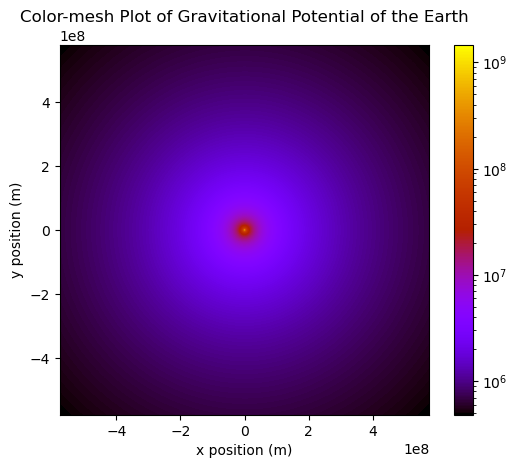

In [9]:
#1.3
x=np.linspace(-d,d,3000)
y = x.copy()

x_grid, y_grid = np.meshgrid(x,y)

z = phi(x_grid, y_grid)

fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, z, norm='log', cmap=cm.gnuplot)

ax.set_aspect("equal")

cbar = fig.colorbar(mesh)
ax.set_xlabel('x position (m)')
ax.set_ylabel('y position (m)')
ax.set_title('Color-mesh Plot of Gravitational Potential of the Earth')

In [10]:
#2.1
def grav_pot(x2,y2, x_m, y_m, M):
    r = np.sqrt((x2-x_m)**2+(y2-y_m)**2)
    return G*M/r

x2 = np.linspace(-1.5*D,1.5*D,2000)
y2 = np.linspace(-1.5*D,1.5*D,2000) 
x2_grid, y2_grid = np.meshgrid(x2,y2)
x_moon = D/np.sqrt(2)
y_moon = D/np.sqrt(2)

phi_e = grav_pot(x2_grid, y2_grid, 0,0, M_e)
phi_m = grav_pot(x2_grid, y2_grid, x_moon, y_moon, M_m)
phi_tot = phi_e + phi_m

Text(0.5, 1.0, 'Color-mesh Plot of Gravitational Potential in the Earth-Moon System')

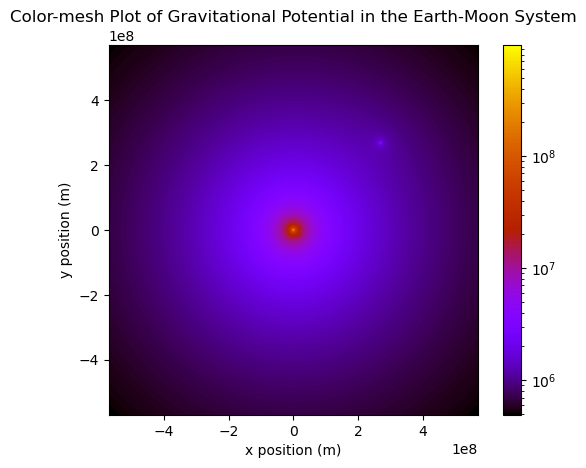

In [13]:
#2.1
import matplotlib.cm as cm
x2_grid, y2_grid = np.meshgrid(x2,y2)


fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x2_grid, y2_grid, phi_tot, norm='log', cmap=cm.gnuplot)
ax.set_aspect("equal")
cbar = fig.colorbar(mesh)
ax.set_xlabel('x position (m)')
ax.set_ylabel('y position (m)')
ax.set_title('Color-mesh Plot of Gravitational Potential in the Earth-Moon System')

Text(0.5, 1.0, 'Contour Plot of Gravitational Potential in the Earth-Moon System')

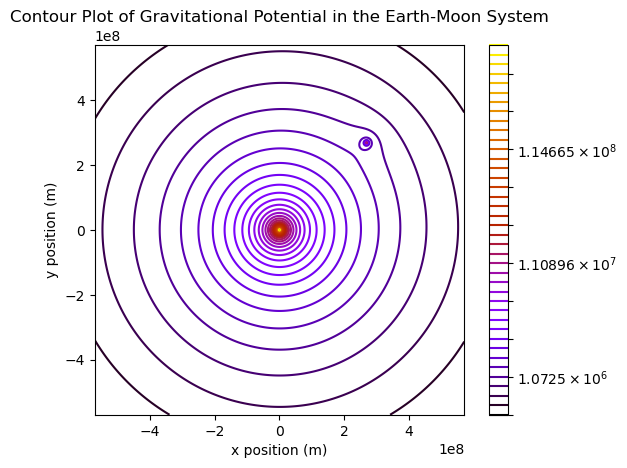

In [42]:
#2.2
from matplotlib.colors import LogNorm 
phi_tot_abs = np.abs(phi_tot)
phi_tot_abs[phi_tot_abs == 0] = 1e-10
norm = LogNorm(vmin=np.min(phi_tot_abs), vmax=np.max(phi_tot_abs))
levels = np.logspace(np.log10(np.min(phi_tot_abs)), np.log10(np.max(phi_tot_abs)), 40)
fig, ax = plt.subplots()
contour = ax.contour(x2_grid, y2_grid, phi_tot_abs, levels=levels, cmap = cm.gnuplot, norm=norm)
cbar = fig.colorbar(contour)
ax.set_aspect('equal')
ax.set_xlabel('x position (m)')
ax.set_ylabel('y position (m)')
ax.set_title('Contour Plot of Gravitational Potential in the Earth-Moon System')

In [66]:
#3.1
def grav_force(M1, m2, x1, y1, x2, y2):
    if np.isclose(x1,x2) and np.isclose(y1,y2):
        ex = np.nan
        ey = np.nan
    else:
        r_squared = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        vec_r = np.array([x2-x1,y2-y1])
        vec_r_hat = vec_r/np.linalg.norm(vec_r)
        ex = -G*M1*m2/r_squared * vec_r_hat[0] #x component
        ey = G*M1*m2/ r_squared * vec_r_hat[1] #y component
    return ex, ey

Text(0.5, 1.0, 'Stream-plot of Gravitational Force in the Earth-Moon System')

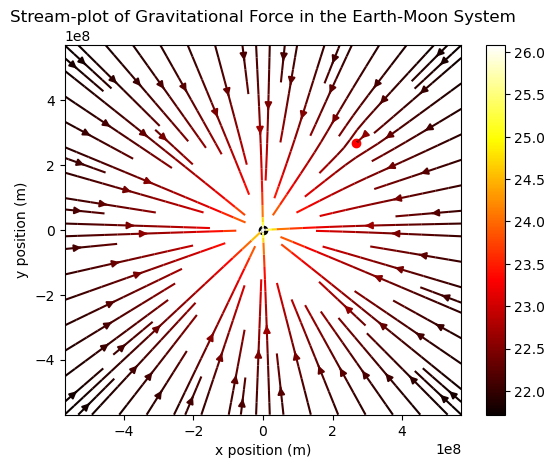

In [69]:
#3.2
fig,ax = plt.subplots(1,1)

ax.plot([0],[0],'ko')
ax.plot([x_moon],[y_moon],'ro')

#building grid
ny = 80
y = np.linspace(-1.5*D,1.5*D,ny)
nx = 80
x = np.linspace(-1.5*D,1.5*D,nx)
x_grid, y_grid = np.meshgrid(x,y)

Ex = np.zeros((ny,nx))
Ey = np.zeros((ny,nx))

for y in range (ny): # visit all y points
    for x in range(nx): #visit all x points
        F_e_x, F_e_y = grav_force(M_e, M_a, 0, 0, x_grid[y,x], y_grid[y,x])
        
        F_m_x, F_m_y = grav_force(M_m, M_a, x_moon, y_moon, x_grid[y,x], y_grid[y,x])
        
        #update container
        Ex[y,x] += (F_e_x +F_m_x)
        Ey[y,x] += (F_e_y +F_m_y)
        
colors=np.log(np.hypot(Ex,Ey))
import matplotlib.cm as cm
stream = ax.streamplot(x_grid, y_grid, Ex, Ey, color=colors, cmap=cm.hot)
cbar = fig.colorbar(stream.lines)
ax.set_xlabel('x position (m)')
ax.set_ylabel('y position (m)')
ax.set_title('Stream-plot of Gravitational Force in the Earth-Moon System')

In [41]:
g = 9.81 #m/s^2
EV = 2.4*10**(3) #m/s exhaust velocity
B = 1.3*10**(4) #Burn rate kg/s
M_w = 2.8*10**6 #kg
M_d = 7.5*10**5 #kg

In [42]:
#4.1
T = (M_w-M_d)/B 
print(T)

157.69230769230768


In [58]:
#4.2
def delta_v(t, M_w, M_d, B, EV, g):
    m_t = M_w-B*t
    return EV*np.log(M_w/m_t) - g*t


In [59]:
#4.3
import scipy
h = scipy.integrate.quad(delta_v, 0, T, args=(M_w, M_d, B, EV, g))
print(h)

(74093.98013366401, 5.848811185394151e-08)
